In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image, ImageChops
import math, operator

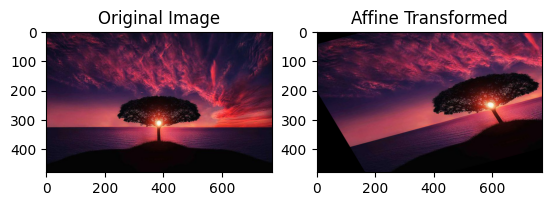

In [4]:
img = cv2.imread('./images/img1.jpg')
rows, cols, ch = img.shape
 
pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])
 
pts2 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]])
 
M = cv2.getAffineTransform(pts1, pts2)
final = cv2.warpAffine(img, M, (cols, rows))
 
plt.subplot(121)
plt.imshow(img[...,::-1])
plt.title('Original Image')
 
plt.subplot(122)
plt.imshow(final[...,::-1])
plt.title('Affine Transformed')
plt.show()

In [5]:
cv2.imshow('img',final)
cv2.waitKey(0)   
cv2.destroyAllWindows()

In [6]:
def affine_transform(image, tile_pts):
    x1, y1, x2, y2, x3, y3 = tile_pts[0,0],tile_pts[0,1],tile_pts[1,0],tile_pts[1,1],tile_pts[2,0],tile_pts[2,1]
    rows, cols = image.shape[:2]

    # Calculate the transformation matrix
    A = np.array([[x1, y1, 1, 0, 0, 0],
                  [0, 0, 0, x1, y1, 1],
                  [x2, y2, 1, 0, 0, 0],
                  [0, 0, 0, x2, y2, 1],
                  [x3, y3, 1, 0, 0, 0],
                  [0, 0, 0, x3, y3, 1]])

    B = np.array([0, 0, cols, 0, 0, rows])
    X = np.linalg.solve(A, B)

    # Create the transformation matrix
    T = np.array([[X[0], X[1], X[2]],
                  [X[3], X[4], X[5]]])

    # Apply the transformation to the image
    transformed_image = np.zeros((rows, cols,3), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            x, y = np.matmul(T, [j, i, 1])
            if x >= 0 and x < cols and y >= 0 and y < rows:
                transformed_image[i][j] = image[int(y)][int(x)]

    return transformed_image

In [7]:
pts1 = np.float32([[50, 50],
                   [200, 50],
                   [50, 200]])
pts2 = np.float32([[10, 100],
                   [200, 50],
                   [100, 250]])
user_affine_img1 = affine_transform(img,pts1)
user_affine_img1 = affine_transform(user_affine_img1,pts2)

In [8]:
cv2.imshow('img',user_affine_img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
def rmse(image1, image2):
    # Ensure that the images have the same shape
    assert image1.shape == image2.shape, "Images must have the same shape"
    # Calculate the mean squared error between the images
    mse = np.mean((image1 - image2) ** 2)
    # Take the square root of the mean squared error to get the root mean squared error
    rmse = np.sqrt(mse)
    return rmse

In [10]:
rmse(final,user_affine_img1)

9.668842326015534

Text(0.5, 1.0, 'Affine Transformed (part b)')

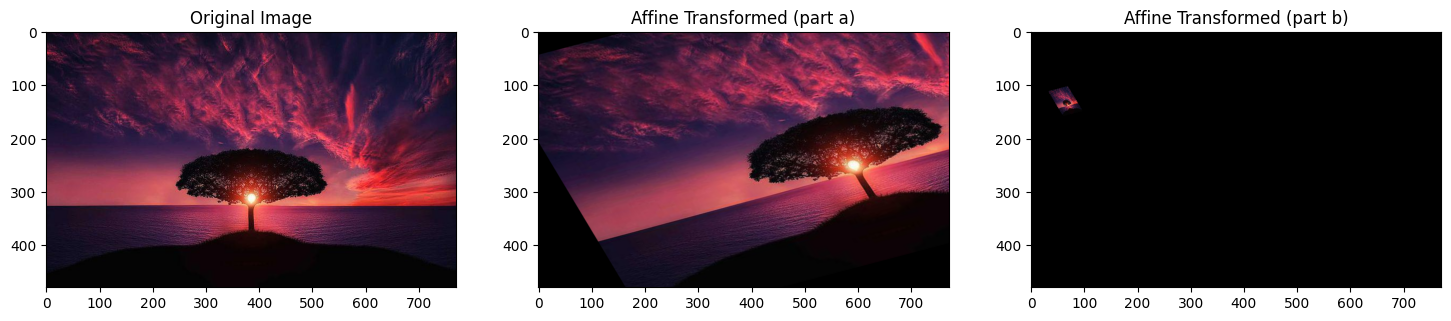

In [11]:
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img[...,::-1]); plt.title('Original Image')
plt.subplot(132); plt.imshow(final[...,::-1]); plt.title('Affine Transformed (part a)')
plt.subplot(133); plt.imshow(user_affine_img1[...,::-1]); plt.title('Affine Transformed (part b)')